# Assignment 1

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 

Project Gutenberg is a good source of for fiction and non-fiction.

E.g below are two most popular books from Project Gutenberg:
- Pride and Prejudice at http://www.gutenberg.org/ebooks/1342.txt.utf-8
- Adventures of Huckleberry Finn at http://www.gutenberg.org/ebooks/76.txt.utf-8

In [63]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

stop_words = nltk.corpus.stopwords.words('english') + ['ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'','\"', '-', '}', '{', '&', '|', u'\u2014' ]
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

def cleanGutenberg (text):
    x = re.search("***", text)
    print(x.start())

def cleanWord (w):
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    return re.sub('^[0-9\.]*$', "", wn)
       
def get_wf (URL):
    r = requests .get(URL)
    t = cleanHtml (r .text) .lower()
    wds = re .split('\s+',t)
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    wf = Counter (wds)
    for k in stop_words:
        wf. pop(k, None)
    tw = 0
    for w in wf:
       tw += wf[w] 
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)
    print(wfs)
    return (wfs [ 0:ml ] [::-1], tw)
           
(wf_gg, tw_gg) = get_wf('https://www.gutenberg.org/cache/epub/526/pg526.txt')
(wf_hod, tw_hod) = get_wf('https://www.gutenberg.org/cache/epub/64317/pg64317.txt')
(wf_lj, tw_lj) = get_wf('https://www.gutenberg.org/cache/epub/5658/pg5658.txt')

[('', 228), ('would', 131), ('said', 130), ('one', 127), ('like', 114), ('could', 111), ('man', 100), ('see', 91), ('kurtz', 89), ('project', 87), ('know', 80), ('time', 74), ('work', 71), ('seemed', 67), ('made', 66), ('came', 62), ('little', 62), ('dont', 60), ('back', 59), ('without', 58), ('upon', 58), ('looked', 56), ('gutenberg-tm', 56), ('though', 55), ('us', 53), ('river', 52), ('long', 51), ('mr', 51), ('well', 50), ('must', 49), ('men', 48), ('saw', 47), ('great', 46), ('head', 46), ('heard', 45), ('something', 45), ('eyes', 45), ('station', 45), ('much', 44), ('two', 44), ('last', 43), ('went', 43), ('black', 43), ('right', 42), ('get', 42), ('say', 41), ('got', 40), ('nothing', 39), ('look', 39), ('still', 38), ('even', 38), ('never', 38), ('way', 37), ('white', 37), ('earth', 36), ('good', 36), ('every', 36), ('manager', 36), ('thing', 35), ('suddenly', 35), ('life', 35), ('left', 35), ('away', 34), ('day', 34), ('first', 34), ('think', 34), ('may', 33), ('come', 33), ('en

[('said', 232), ('gatsby', 175), ('“i', 175), ('tom', 163), ('one', 135), ('daisy', 135), ('like', 116), ('came', 108), ('back', 105), ('little', 102), ('project', 90), ('went', 90), ('man', 86), ('house', 85), ('eyes', 85), ('know', 84), ('got', 83), ('looked', 82), ('didn’t', 81), ('old', 79), ('mr', 78), ('don’t', 73), ('new', 72), ('way', 71), ('get', 71), ('time', 71), ('moment', 70), ('us', 70), ('two', 69), ('see', 68), ('gatsby’s', 67), ('around', 67), ('away', 66), ('going', 65), ('door', 65), ('something', 64), ('turned', 64), ('made', 63), ('hand', 63), ('could', 62), ('long', 62), ('think', 62), ('come', 61), ('night', 61), ('“you', 61), ('wilson', 61), ('people', 60), ('never', 60), ('jordan', 60), ('go', 59), ('voice', 57), ('gutenberg-tm', 56), ('want', 55), ('work', 55), ('car', 54), ('knew', 53), ('room', 53), ('first', 53), ('saw', 52), ('would', 51), ('face', 51), ('began', 50), ('took', 48), ('thought', 47), ('toward', 47), ('…', 46), ('told', 44), ('last', 44), (''

[('', 1249), ('would', 526), ('said', 401), ('like', 401), ('one', 392), ('could', 382), ('man', 313), ('jim', 274), ('made', 267), ('time', 247), ('little', 234), ('upon', 223), ('seemed', 219), ('head', 213), ('know', 212), ('men', 207), ('eyes', 195), ('see', 186), ('old', 183), ('back', 178), ('without', 176), ('though', 171), ('two', 167), ('last', 163), ('went', 154), ('nothing', 153), ('go', 152), ('white', 152), ('come', 152), ('don’t', 151), ('came', 151), ('face', 150), ('way', 149), ('away', 146), ('never', 145), ('get', 142), ('life', 141), ('first', 140), ('much', 136), ('brown', 134), ('make', 132), ('long', 130), ('say', 129), ('hand', 128), ('us', 126), ('good', 125), ('“i', 125), ('think', 124), ('voice', 124), ('thing', 124), ('something', 122), ('heard', 121), ('sort', 120), ('sea', 119), ('must', 117), ('”', 117), ('got', 116), ('enough', 116), ('looked', 115), ('ship', 114), ('people', 111), ('suddenly', 107), ('every', 104), ('many', 103), ('great', 102), ('night'

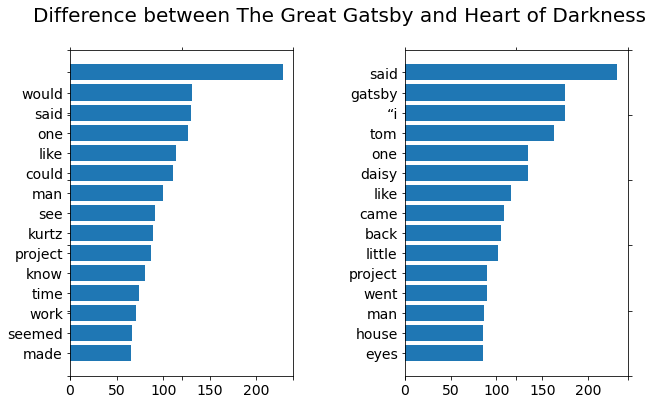

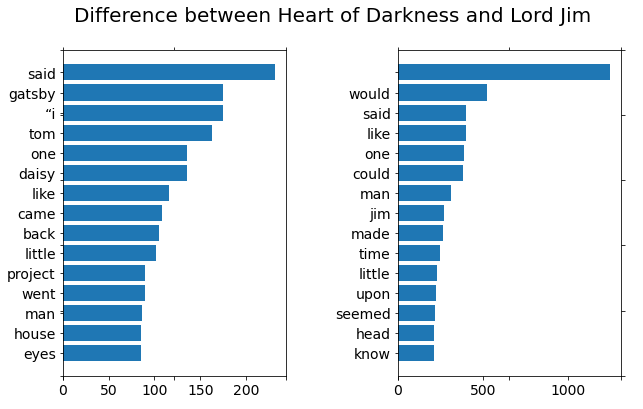

In [60]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

plotTwoLists (wf_gg, wf_hod, 'Difference between The Great Gatsby and Heart of Darkness')
plotTwoLists (wf_ho, wf_lj, 'Difference between Heart of Darkness and Lord Jim')